# Loan Application Status Prediction

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('LOAN_STATUS_PREDICTION.CSV')

First 5 entries

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Last 5 entries

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns.

Datatype of the features

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Columns of the dataset

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Information about the features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Class Imbalance

In [9]:
print(df['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


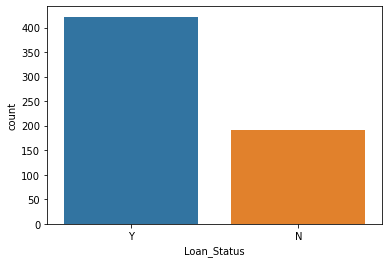

In [10]:
sns.countplot(x="Loan_Status",data=df);

# Missing Values

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

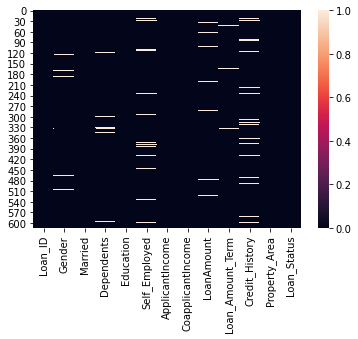

In [12]:
sns.heatmap(df.isnull())

# Statistical Calculation

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001658,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


ApplicantIncome and CoapplicantIncome contain extreme outliers.

# Encoding Target variable

In [16]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Loan_Status"]=LE.fit_transform(df["Loan_Status"])

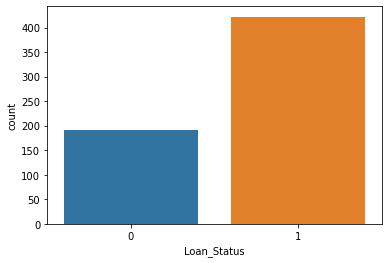

In [17]:
sns.countplot(x='Loan_Status',data=df);

1 represents Yes and 0 represents No.

# Checking Correlation

In [18]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

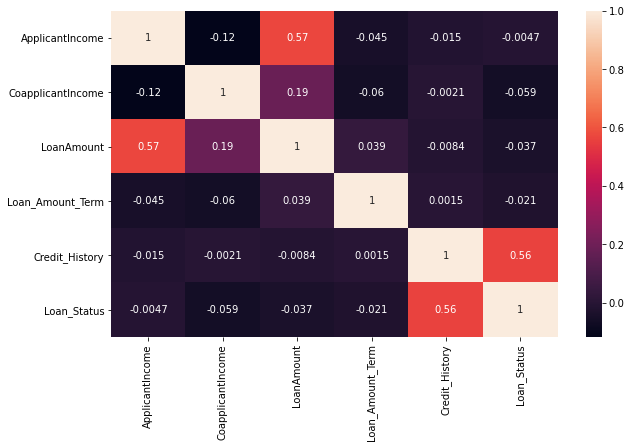

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

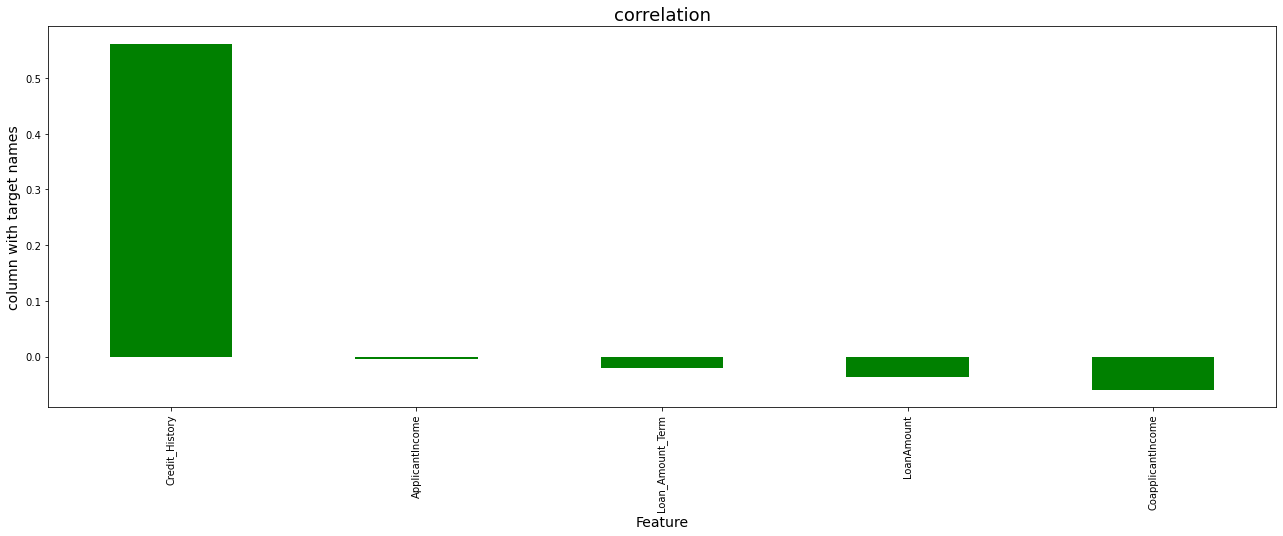

In [20]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color="g")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Credit_History is highly correlated with target variable and all other variables are positively correlated.

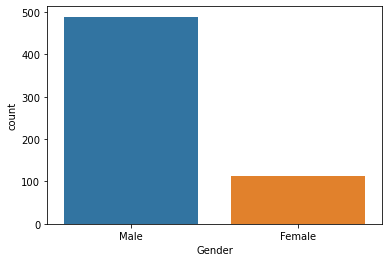

In [21]:
sns.countplot(x="Gender",data=df);

Above plot shows that count of male is highest .

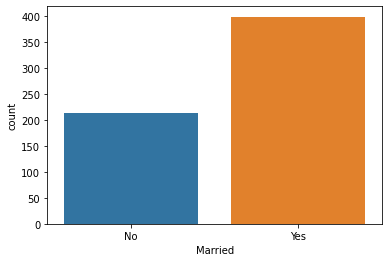

In [22]:
sns.countplot(x="Married",data=df);

Count of married people is higher.

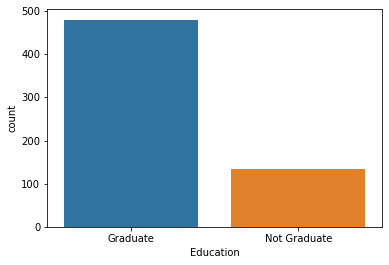

In [23]:
sns.countplot(x="Education",data=df);

Count of Graduate is higher than the Not Graduate

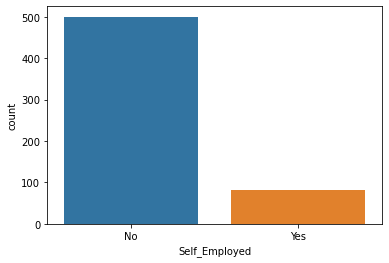

In [24]:
sns.countplot(x="Self_Employed",data=df);

Count of Self_Employed people is very less. 

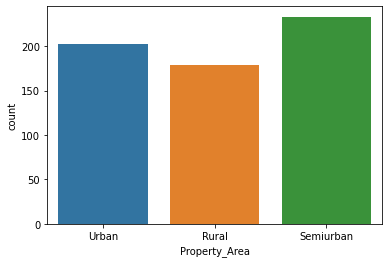

In [25]:
sns.countplot(x="Property_Area",data=df);

Count of Semiurban people is highest.

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

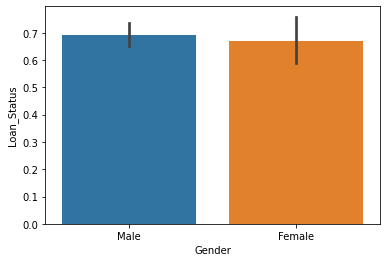

In [26]:
sns.barplot(x="Gender",y="Loan_Status",data=df)

There is not much difference between male and female regarding Loan_Status

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

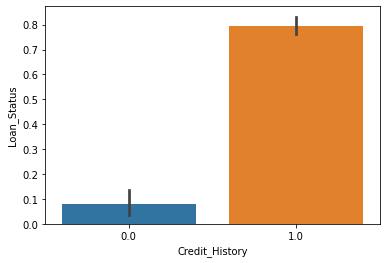

In [27]:
sns.barplot(x="Credit_History",y="Loan_Status",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

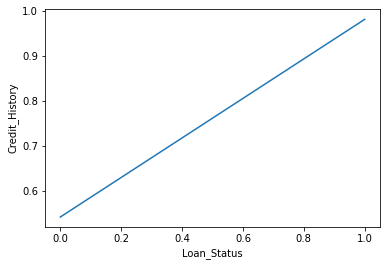

In [28]:
sns.lineplot(x="Loan_Status",y="Credit_History",data=df)

Loan_Status and Credit_History have linear relationship.

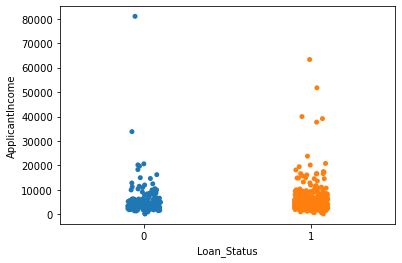

In [29]:
sns.stripplot(x="Loan_Status",y="ApplicantIncome",data=df);

People with low income does not have high loan status except at 80000. 

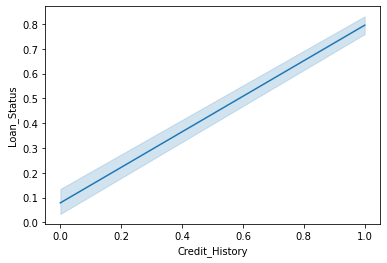

In [30]:
sns.lineplot(x="Credit_History",y="Loan_Status",data=df);

Credit_History has linear relationship with Loan_Status.

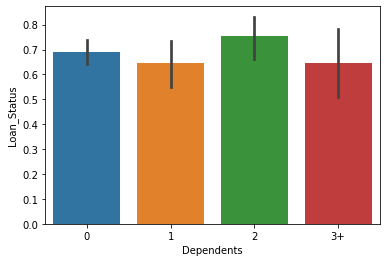

In [31]:
sns.barplot(x="Dependents",y="Loan_Status",data=df);

People with 2 dependents have highest loan status.

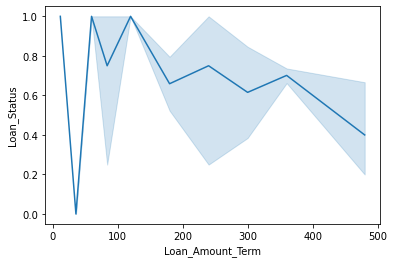

In [32]:
sns.lineplot(x="Loan_Amount_Term",y="Loan_Status",data=df);

Above plot shows that as Loan_Amount_Term increases after 100 loan status goes on decreasing.

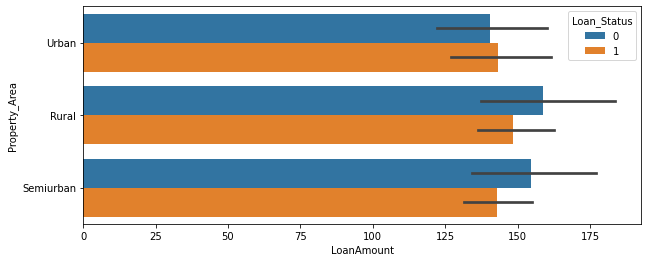

In [33]:
plt.figure(figsize=(10,4))
sns.barplot(x="LoanAmount",y="Property_Area",hue="Loan_Status",data=df);

People belonging to rural have highest property area and loan amount but highest rejection of loan is also for rural area.

# Multivariate Analysis

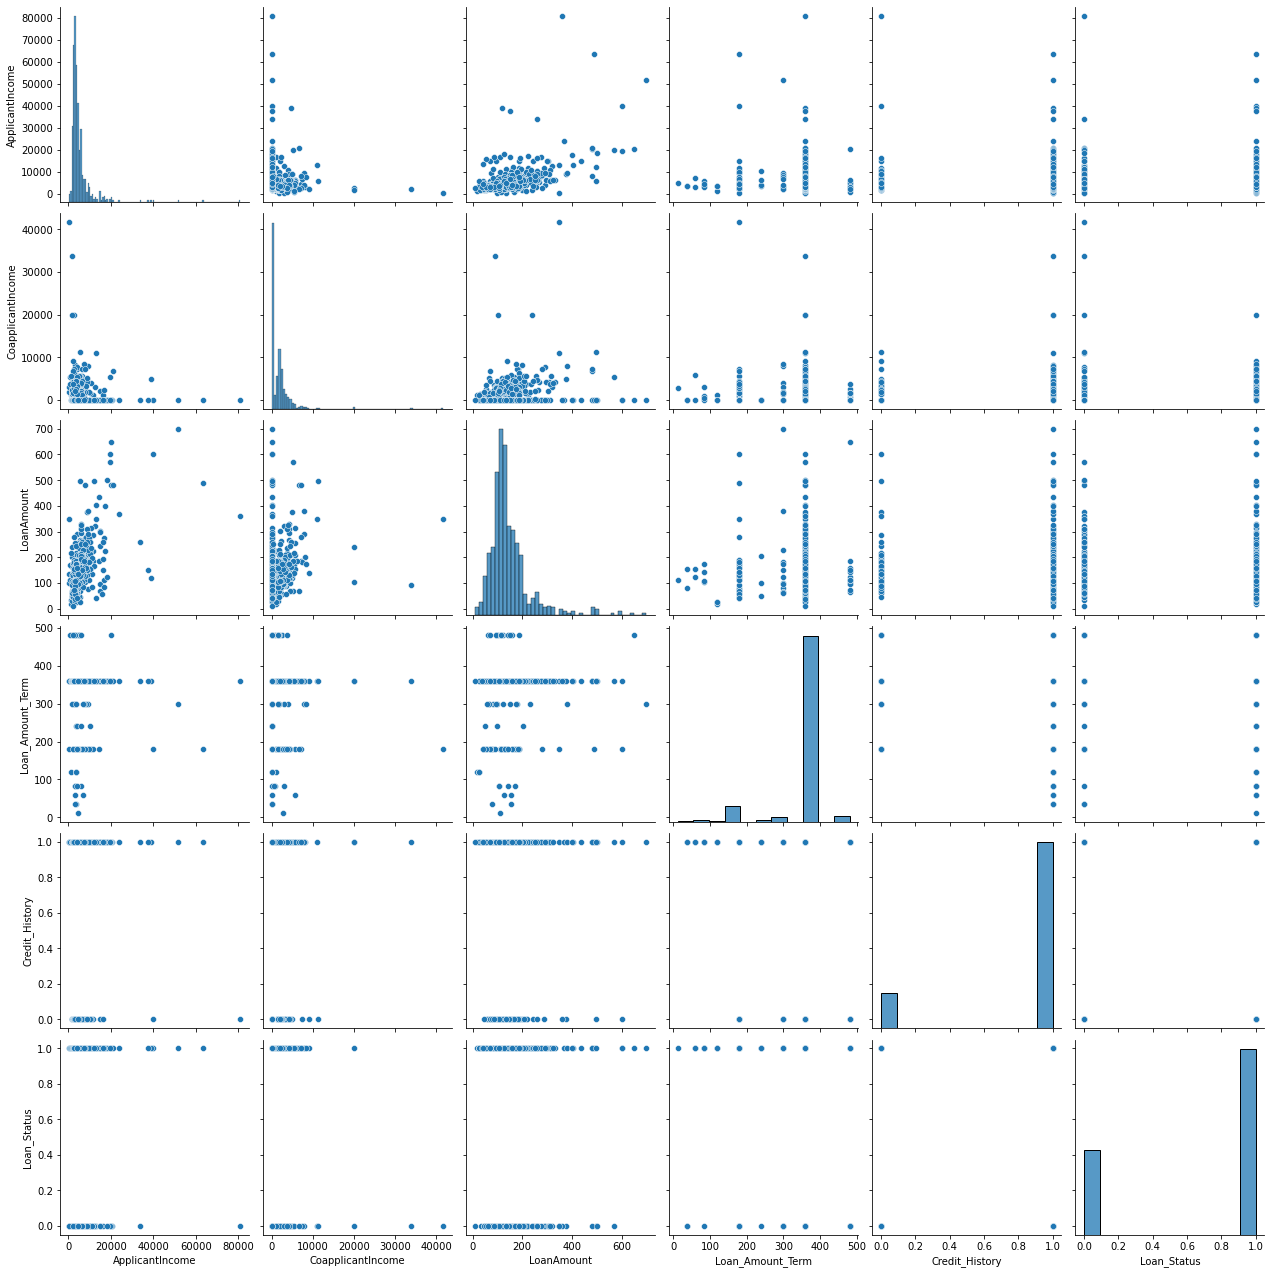

In [34]:
sns.pairplot(df,size=3)

# Box Plots showing outliers

In [35]:
numerical_features=df[df.select_dtypes(include=[np.number]).columns]

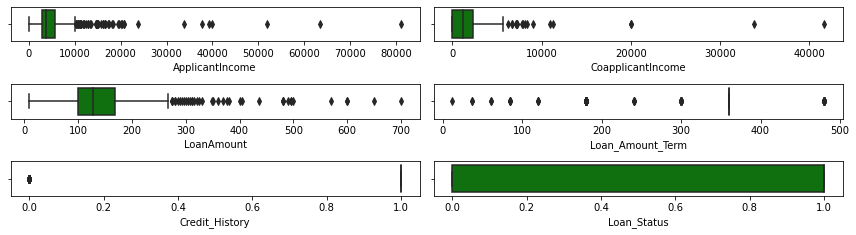

In [36]:
collist=numerical_features.columns.values
ncol=2
nrows=4
plt.figure(figsize=(12,2*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Treating Null Values

In [37]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [38]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [39]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

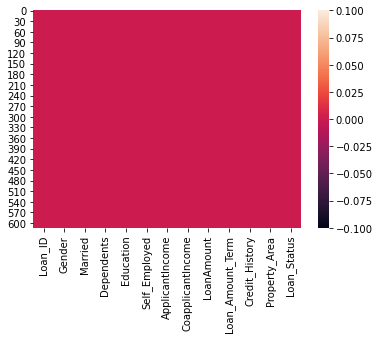

In [40]:
sns.heatmap(df.isnull())

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Encoding

In [42]:
LE=LabelEncoder()
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Education']=LE.fit_transform(df['Education'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Dependents']=LE.fit_transform(df['Dependents'])

In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [44]:
df.drop("Loan_ID",axis=1,inplace=True)

# Separating x(Independent) and y(target) variable.

In [45]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [46]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [47]:
x.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

# Balancing class

In [48]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Treating Skewness

In [49]:
x_over.skew()

Gender              -1.326806
Married             -0.292688
Dependents           1.155670
Education            1.586778
Self_Employed        2.594461
ApplicantIncome      6.515665
CoapplicantIncome    7.804296
LoanAmount           2.585611
Loan_Amount_Term    -2.253716
Credit_History      -1.245989
Property_Area        0.143543
dtype: float64

In [50]:
for index in x_over.skew().index:
    if x_over.skew().loc[index]>0.5:
        x_over[index]=np.log1p(x_over[index])
    if x_over.skew().loc[index]<-0.5:
        x_over[index]=np.square(x_over[index])

In [51]:
x_over.skew()

Gender              -1.326806
Married             -0.292688
Dependents           0.778153
Education            1.586778
Self_Employed        2.594461
ApplicantIncome      0.558251
CoapplicantIncome   -0.078520
LoanAmount          -0.282968
Loan_Amount_Term    -0.970363
Credit_History      -1.098498
Property_Area        0.143543
dtype: float64

# Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)
x_over.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,0.581854,0.000000,0.601711,0.562226,1.0,1.0
1,1.0,1.0,0.5,0.0,0.0,0.543052,0.688057,0.601711,0.562226,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.475649,0.000000,0.447563,0.562226,1.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.451844,0.730059,0.586647,0.562226,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.585909,0.000000,0.624304,0.562226,1.0,1.0


# Finding the best random state

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8307086614173228 on Random State:  184


# Train Test Split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=184)

# Model Selection

# Logistic Regression

In [55]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8307086614173228
[[ 88  31]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       119
           1       0.80      0.91      0.85       135

    accuracy                           0.83       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.84      0.83      0.83       254



# KNeighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score:
0.8070866141732284
[[ 85  34]
 [ 15 120]]
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       119
           1       0.78      0.89      0.83       135

    accuracy                           0.81       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.81      0.81      0.81       254



# GaussianNB

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

accuracy_score:
0.8267716535433071
[[ 84  35]
 [  9 126]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       119
           1       0.78      0.93      0.85       135

    accuracy                           0.83       254
   macro avg       0.84      0.82      0.82       254
weighted avg       0.84      0.83      0.82       254



# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy_score:
0.7637795275590551
[[99 20]
 [40 95]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       119
           1       0.83      0.70      0.76       135

    accuracy                           0.76       254
   macro avg       0.77      0.77      0.76       254
weighted avg       0.77      0.76      0.76       254



# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8307086614173228
[[ 97  22]
 [ 21 114]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       119
           1       0.84      0.84      0.84       135

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



# AdaBoost Classifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.7874015748031497
[[ 92  27]
 [ 27 108]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       119
           1       0.80      0.80      0.80       135

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.79      0.79      0.79       254



# Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.70414201 0.73372781 0.79289941 0.83431953 0.83333333]
0.7796844181459567


In [62]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.67455621 0.71005917 0.81065089 0.79881657 0.80357143]
0.759530853761623


In [63]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gnb,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.68047337 0.72781065 0.81656805 0.79881657 0.80952381]
0.7666384897154128


In [64]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.69230769 0.73372781 0.79289941 0.81065089 0.79761905]
0.7654409692871231


In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.73964497 0.75739645 0.85207101 0.85207101 0.91666667]
0.8235700197238659


In [66]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x_over,y_over,cv=5)
print(score)
print(score.mean())

[0.69230769 0.73964497 0.81656805 0.81065089 0.8452381 ]
0.7808819385742463


As the least difference between accuracy and cross validation score is for DecisionTreeClassifier it is our best model.

# Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
parameter={'criterion':['gini','entropy'],'max_depth':list(np.arange(1,10)),'min_samples_split':list(np.arange(1,11)),
           'min_samples_leaf':list(np.arange(1,10))}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [68]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=5,min_samples_leaf=3)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.74015748031496


# AUC-ROC CURVE

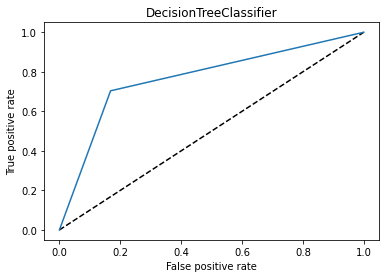

0.7678182384064737

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

# Saving the model

In [70]:
import joblib
joblib.dump(dtc,'dtcfile1.obj')

['dtcfile1.obj']

# Prediction

In [71]:
dtc_from_joblib=joblib.load('dtcfile1.obj')
dtc_from_joblib.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])